In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.preprocessing import LabelBinarizer,PolynomialFeatures
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from seaborn import heatmap,regplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv("Rice_Osmancik_Cammeo_Dataset.csv")
lb= LabelBinarizer()
ds

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [3]:
ds['CLASS']=lb.fit_transform(ds["CLASS"])
lb.classes_

array(['Cammeo', 'Osmancik'], dtype='<U8')

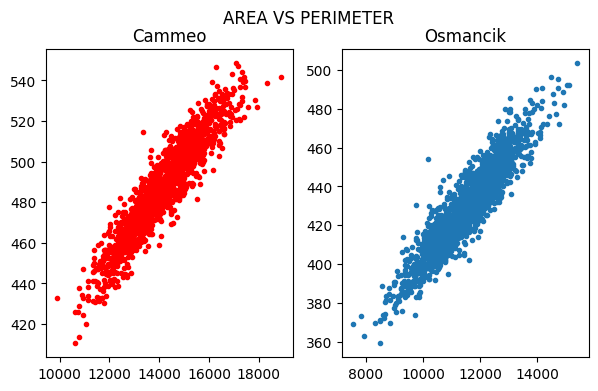

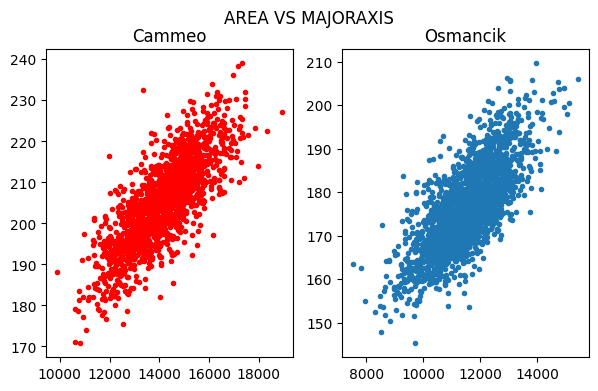

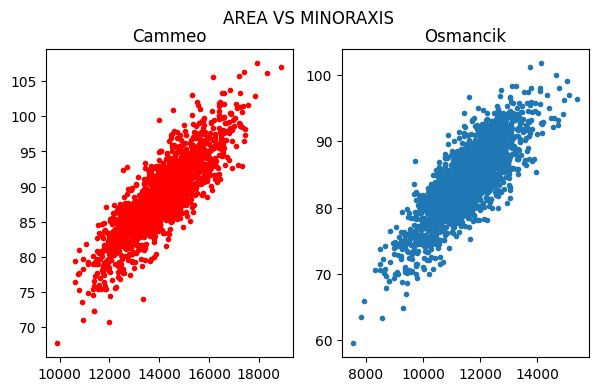

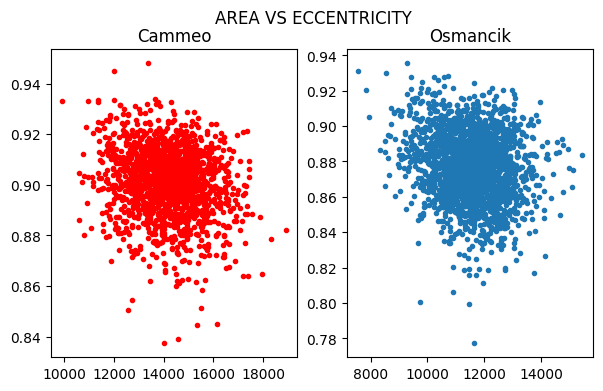

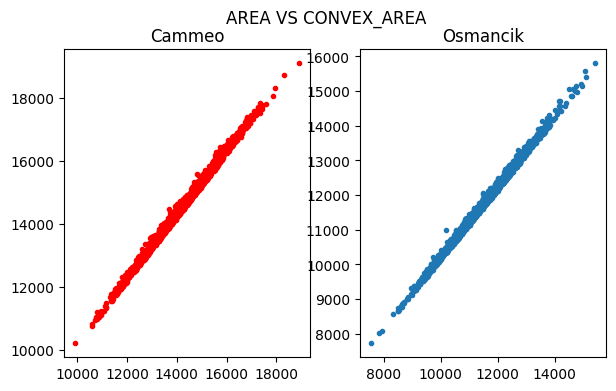

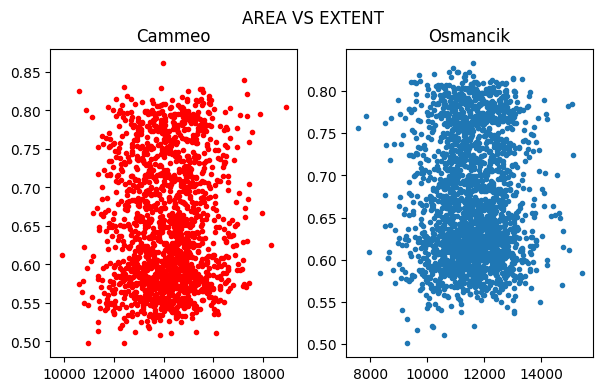

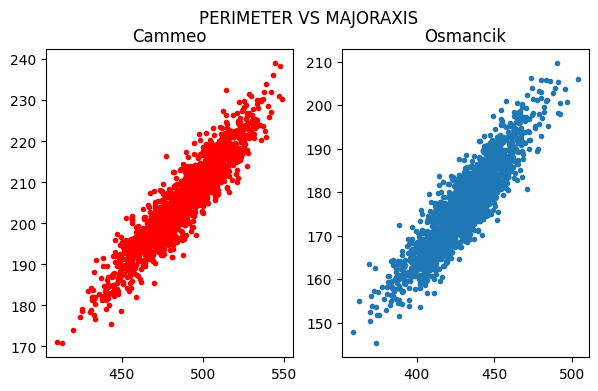

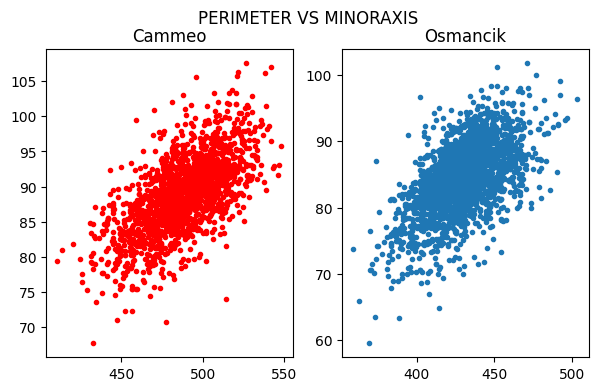

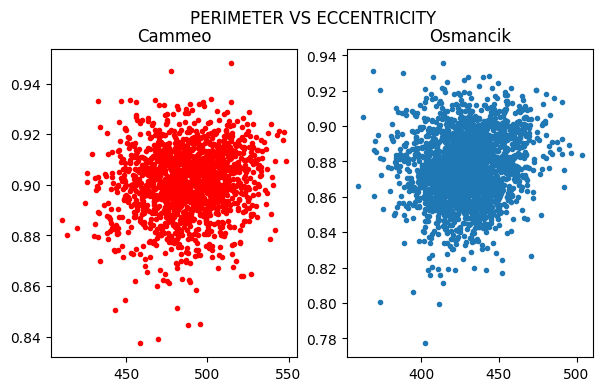

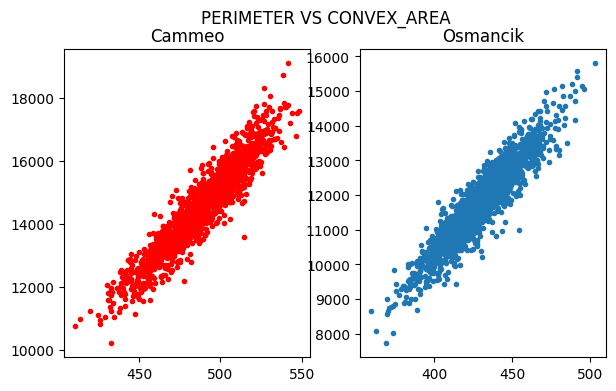

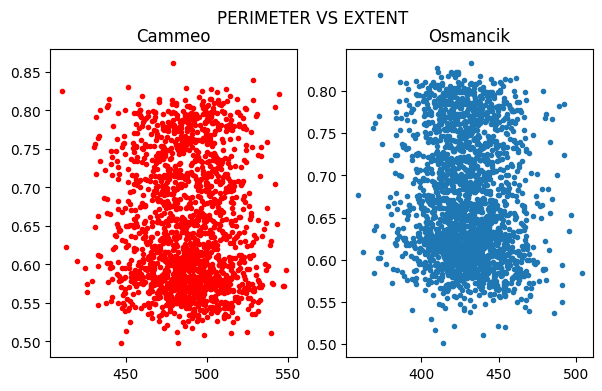

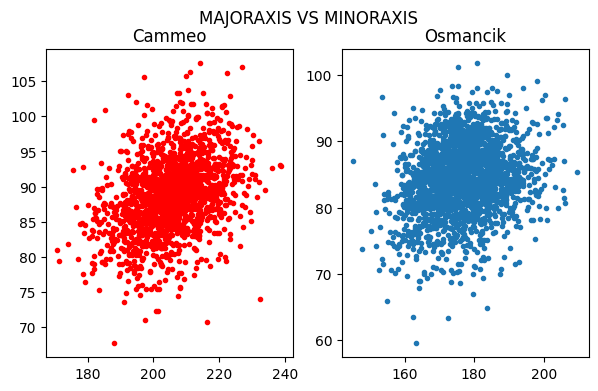

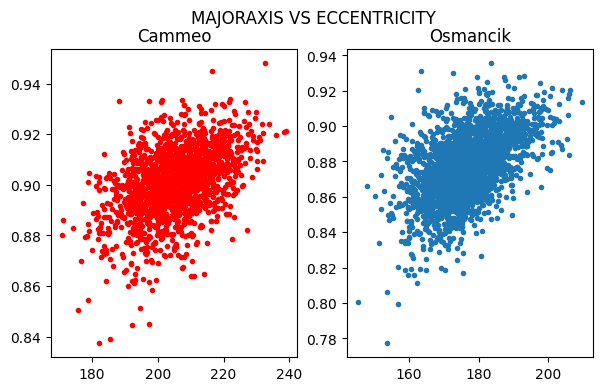

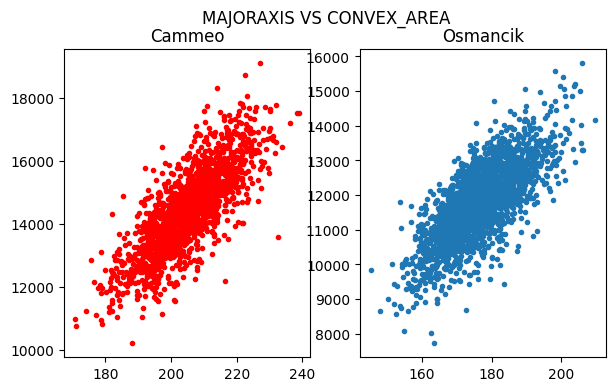

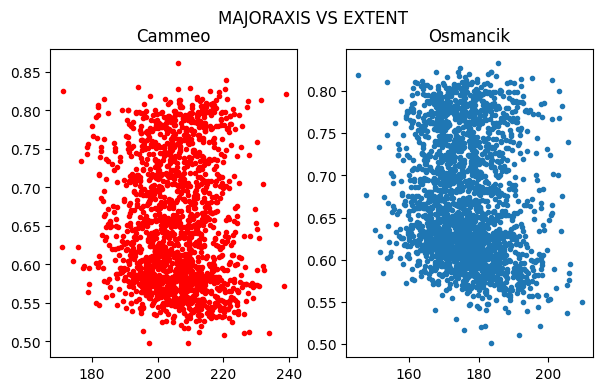

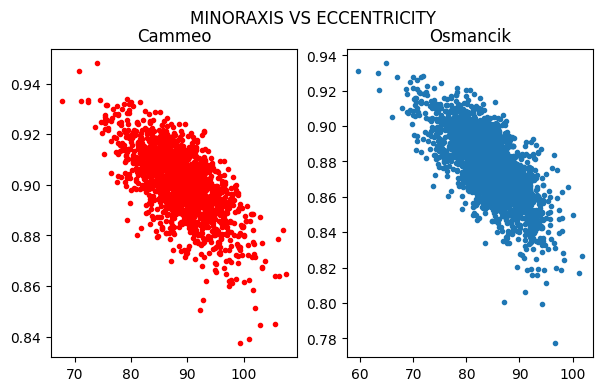

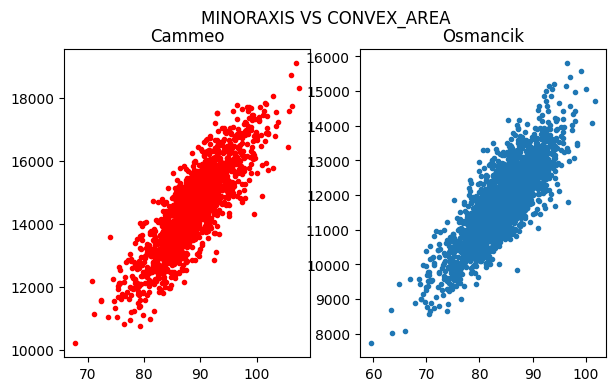

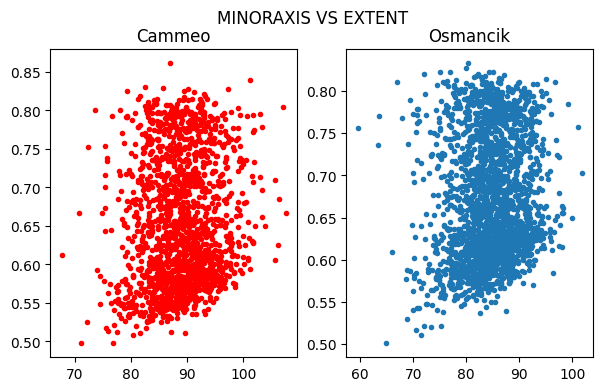

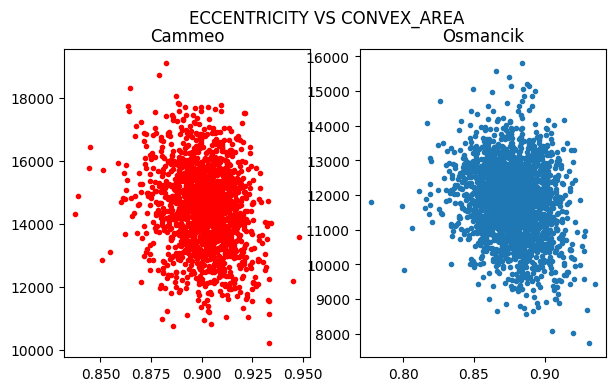

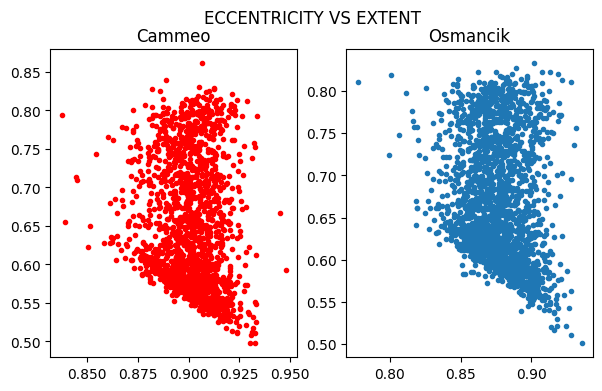

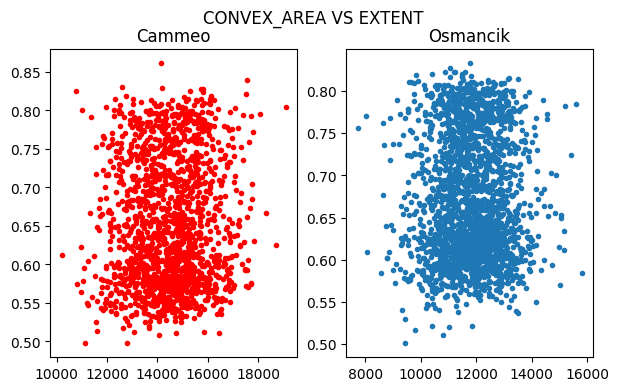

In [4]:
for i in range(7):
    for j in range(i,7):
        if(i!=j):
            plt.figure(figsize=(7,4))
            plt.subplot(1,2,1)
            plt.suptitle(ds.columns.values[i]+" VS "+ds.columns.values[j])
            plt.title('Cammeo')
            plt.scatter(ds.iloc[:1630,i],ds.iloc[:1630,j],color='Red',marker='.')
            plt.subplot(1,2,2)
            plt.title('Osmancik')
            plt.scatter(ds.iloc[1630:,i],ds.iloc[1630:,j],color='tab:blue',marker='.')
    plt.show()

In [5]:
loss_list=list()
acc_list=list()
state=list()
for x in range(0,50):
    for y in range(0,5):
        mdl=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4,max_leaf_nodes=5,min_samples_leaf=10,random_state=y)
        Xtrain,Xtest,Ytrain,Ytest=train_test_split(ds.iloc[:,0:-1],np.array(ds["CLASS"]),train_size=0.80,random_state=x,shuffle=True)
        mdl.fit(Xtrain,Ytrain)
        y_pred=mdl.predict(Xtest)
        loss=mean_squared_error(Ytest,y_pred)
        loss_list.append(loss)
        state.append([x,y])
        acc_list.append(accuracy_score(Ytest,y_pred))

<function matplotlib.pyplot.show(close=None, block=None)>

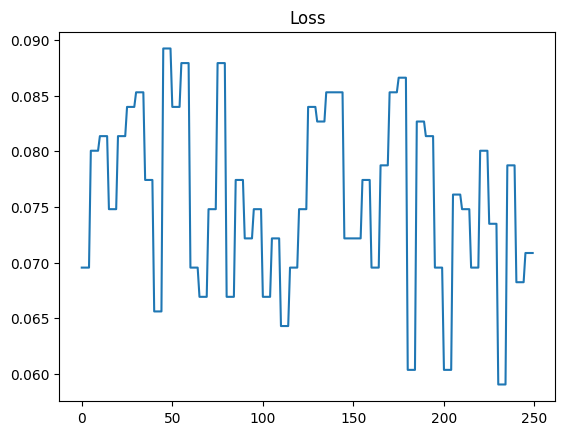

In [6]:
plt.title("Loss")
plt.plot(loss_list)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

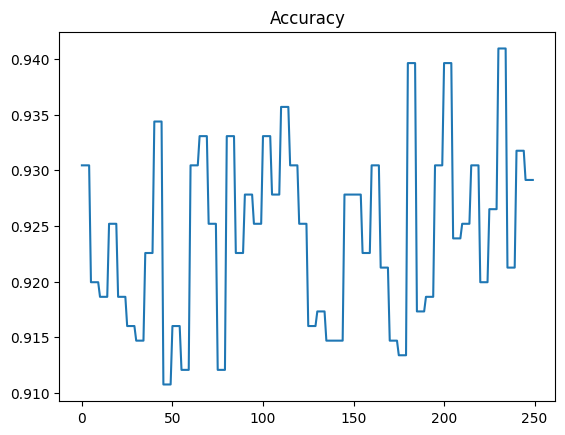

In [7]:
plt.title("Accuracy")
plt.plot(acc_list)
plt.show

In [8]:
np.argmin(loss_list),np.argmax(acc_list),state[np.argmax(acc_list)]

(230, 230, [46, 0])

Loss:0.05905511811023622 
Accuracy:0.9409448818897638 
Rice Types:['Cammeo' 'Osmancik']
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       320
           1       0.95      0.95      0.95       442

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762

R2_score TrainSet:0.6974463935909485
R2_score TestSet:0.7575650452488687


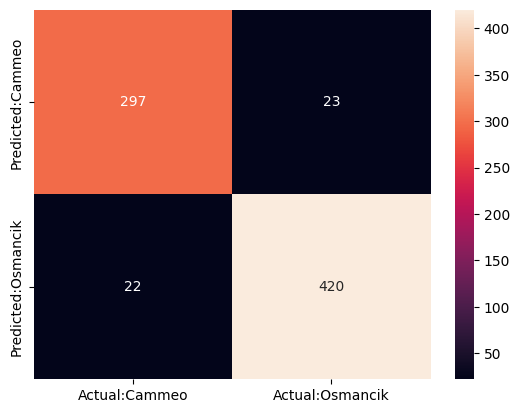

In [9]:
mdl=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,max_leaf_nodes=4,min_samples_leaf=10,random_state=0)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(ds.iloc[:,0:-1],ds["CLASS"],train_size=0.80,random_state=46,shuffle=True)
mdl.fit(Xtrain,Ytrain)
y_pred=mdl.predict(Xtest)
loss=mean_squared_error(Ytest,y_pred)
acc=accuracy_score(Ytest,y_pred)
c=confusion_matrix(Ytest,y_pred)
classes=lb.classes_
heatmap(c,annot=True,fmt=".0f",yticklabels=[f'Predicted:{classes[0]}',f'Predicted:{classes[1]}'],xticklabels=[f"Actual:{classes[0]}",f"Actual:{classes[1]}"])
print(f"Loss:{loss} \nAccuracy:{acc} \nRice Types:{lb.classes_}\nClassification report:\n{classification_report(Ytest,y_pred)}\nR2_score TrainSet:{r2_score(Ytrain,mdl.predict(Xtrain))}\nR2_score TestSet:{r2_score(Ytest,y_pred)}")
plt.show()

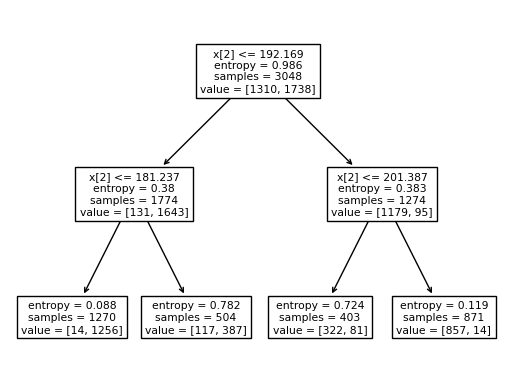

In [10]:
tree.plot_tree(mdl)
plt.show()